# 如何再输入数据的时候制定列的类型？
    df.read_csv(dtype={'a':int,'b':'category'})

## 如何再已读入的时候改变列的类型？
注意一定要赋值
    df['A'] = df['A'].astype('category')

In [137]:
import pandas as pd

titan = pd.read_csv("./train.csv")
print titan.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [138]:
t_type={"PassengerId":"int32",
        "Survived":"bool",
        "Pclass":"category",
        "Name":"string",
        "Sex":"category",
        "Age":"float",
        "SibSp":"int32",
        "Parch":"int32",
        "Ticket":"string",
        "Fare":"float",
        "Cabin":"string",
        "Embarked":"category"
}
titan2 = pd.read_csv("./train.csv",dtype=t_type)
titan2
print titan2.dtypes

PassengerId       int32
Survived           bool
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int32
Parch             int32
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


# 处理age的缺失值

In [139]:
titan["Age"]=titan["Age"].fillna(titan["Age"].mean())

In [140]:
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
import matplotlib.pyplot as plt

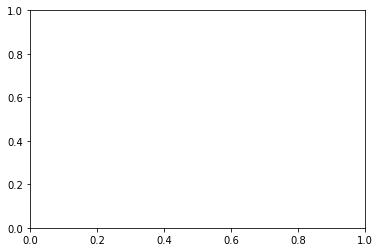

In [142]:
fig,ax = plt.subplots()

In [143]:
ax.plot(titan["Age"],titan["Survived"],'o')

In [144]:
plt.show()

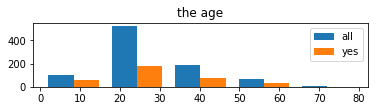

In [145]:
import pandas as pd
import matplotlib.pyplot as plt


titan = pd.read_csv("./train.csv")


# 对数据进行类别的处理
titan["Age"]=titan["Age"].fillna(titan["Age"].mean())
# titan["Pclass"]=titan["Pclass"].astype('category')
titan["Sex"]=titan["Sex"].astype('category')
titan["Embarked"]=titan["Embarked"].astype('category')
# titan["SibSp"]=titan["SibSp"].astype('category')
# titan["Parch"]=titan["Parch"].astype('category')


# 画图操作
fig = plt.figure()

plt.subplot(311)
# 取出生存者，和死亡者的年龄，年龄为连续值
age_yes = titan["Age"][titan["Survived"]==1]
age_no = titan["Age"][titan["Survived"]==0]
age_all = [pd.concat([age_yes,age_no]),age_yes]
plt.hist(age_all,5,histtype="bar",label=["all","yes"])
plt.title("the age")
plt.legend()

In [146]:
import numpy as np

In [147]:
pd.pivot_table(titan[['Sex',"Survived"]],values="Survived",columns="Sex",aggfunc=np.sum)

Sex,female,male
Survived,233,109


## 副本或者是原始值
df.loc[row_indexer,col_indexer] 返回的是原始的实际值
df['col_indexer']返回的是pandas的副本

In [148]:
sexs=titan[['Sex',"Survived"]]
sexs["count"]=1
sexs

/home/zhouyao/workspace/intelij/pycharm/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sex,Survived,count
0,male,0,1
1,female,1,1
2,female,1,1
3,female,1,1
4,male,0,1
5,male,0,1
6,male,0,1
7,male,0,1
8,female,1,1
9,female,1,1


# 性别是很重要的特征

In [149]:
sexs_prob=pd.pivot_table(sexs,index = "Sex",columns="Survived",values="count",aggfunc=np.sum)
sexs_prob['pres'] = sexs_prob[1]/(sexs_prob[1]+sexs_prob[0])
sexs_prob

Survived,0,1,pres
Sex,,,
female,81,233,0.742038
male,468,109,0.188908


# 性别比例画图

# 仓位信息与生存几率

In [150]:
pclass_sur = titan[['Pclass','Survived']]
pclass_sur["count"]=1
pclass_sur

/home/zhouyao/workspace/intelij/pycharm/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Survived,count
0,3,0,1
1,1,1,1
2,3,1,1
3,1,1,1
4,3,0,1
5,3,0,1
6,1,0,1
7,3,0,1
8,3,1,1
9,2,1,1


In [151]:
pclass_sur_piv=pd.pivot_table(pclass_sur,index='Pclass',columns='Survived',values='count',aggfunc=np.sum)
pclass_sur_piv["pers"]=pclass_sur_piv[1]/(pclass_sur_piv[0]+pclass_sur_piv[1])
pclass_sur_piv

Survived,0,1,pers
Pclass,,,
1,80,136,0.629630
2,97,87,0.472826
3,372,119,0.242363


([array([  80.,    0.,   97.,    0.,  372.]),
  array([ 136.,    0.,   87.,    0.,  119.])],
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ]),
 <a list of 2 Lists of Patches objects>)

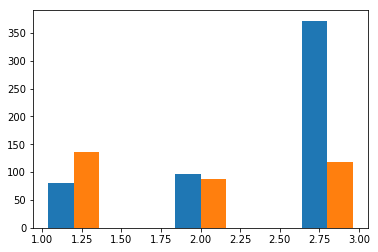

In [152]:
age_yes = titan["Pclass"][titan["Survived"]==1]
age_no = titan["Pclass"][titan["Survived"]==0]
# age_all = [pd.concat([age_yes,age_no]),age_yes]
age_all = [age_no,age_yes]
plt.hist(age_all,5,histtype="bar",label=["all","yes"])

In [153]:
slib_s = titan[["SibSp","Survived"]]
slib_s['count']=1
slib_s

/home/zhouyao/workspace/intelij/pycharm/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SibSp,Survived,count
0,1,0,1
1,1,1,1
2,0,1,1
3,1,1,1
4,0,0,1
5,0,0,1
6,0,0,1
7,3,0,1
8,0,1,1
9,1,1,1


In [154]:
sibsp_s=pd.pivot_table(slib_s,index="SibSp",columns='Survived',values='count',aggfunc=np.sum)
sibsp_s[1]=sibsp_s[1].fillna(0)
# sibsp_s["pres"] = slib_s[1]/(slib_s[1]+slib_s[0])
sibsp_s

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,0.0
8,7.0,0.0


In [155]:
par_s1 = titan[["Parch","Survived"]]
par_s1["Parch"][par_s1["Parch"]>1]=1
par_s1['count']=1
par_s=pd.pivot_table(par_s1,index="Parch",columns='Survived',values='count',aggfunc=np.sum)
par_s[1]=par_s[1].fillna(0)
par_s["pres"] = par_s[1]/(par_s[1]+par_s[0])
par_s

/home/zhouyao/workspace/intelij/pycharm/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Survived,0,1,pres
Parch,,,
0,445,233,0.343658
1,104,109,0.511737


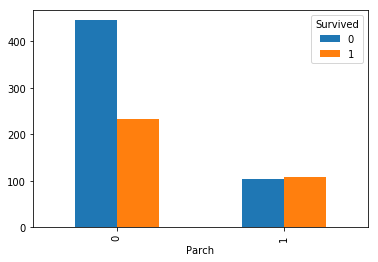

In [156]:
par_s[[0,1]].plot(kind="bar")

/home/zhouyao/workspace/intelij/pycharm/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


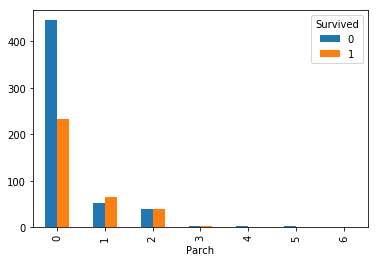

In [157]:
par_s1 = titan[["Parch","Survived"]]
par_s1['count']=1
par_s=pd.pivot_table(par_s1,index="Parch",columns='Survived',values='count',aggfunc=np.sum)
par_s[1]=par_s[1].fillna(0)
par_s["pres"] = par_s[1]/(par_s[1]+par_s[0])
par_s
par_s[[0,1]].plot(kind="bar")

In [158]:
emb_s = titan[["Embarked","Survived"]]
emb_s['count']=1
emb_s=pd.pivot_table(emb_s,index="Embarked",columns='Survived',values='count',aggfunc=np.sum)
emb_s[1]=emb_s[1].fillna(0)
emb_s["pres"] = emb_s[1]/(emb_s[1]+emb_s[0])
emb_s

/home/zhouyao/workspace/intelij/pycharm/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Survived,0,1,pres
Embarked,,,
C,75,93,0.553571
Q,47,30,0.389610
S,427,217,0.336957


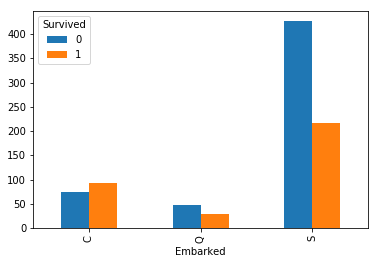

In [159]:
emb_s[[0,1]].plot(kind="bar")

In [160]:
emb_s[[0,1]]

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


# 当列为数字的时候，选取列有两种写法
1. 直接 emb_s[[0,1]]这样选取多列
2. 用loc数组，注意，emb_s.loc[:,1]表示**列名**为1的列

In [161]:
emb_s.loc[:,[0,1]]

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [162]:
emb_s.loc[:,0]

Embarked
C     75
Q     47
S    427
Name: 0, dtype: int64

In [163]:
emb_s.loc[:,[0]]

Survived,0
Embarked,
C,75
Q,47
S,427


In [164]:
list(emb_s.index)

['C', 'Q', 'S']

In [165]:
list(emb_s[0])

[75, 47, 427]

In [166]:
emb_s['pres']

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: pres, dtype: float64

# 画这种多轴的图如何画
1. 手动生成跟列表长度相同的数字序列
2. 把这些数字作为横轴，需要画的数据作为值，画一个轴
3. 重复，画第二个值
4. 手动定义标签的位置
5. 手动赋值标签的值

[Text(0,0,u'C'), Text(0,0,u'Q'), Text(0,0,u'S')]

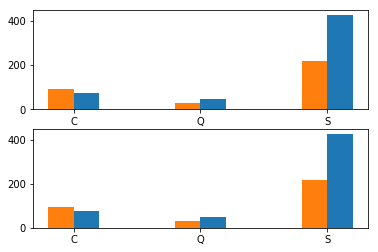

In [167]:
fig = plt.figure()
ax = plt.subplot(211)
width = 0.2
ind = np.arange(len(emb_s[0]))
ax.bar(ind+width,list(emb_s[0]),width)
ax.bar(ind,list(emb_s[1]),width)
ax.set_xticks(ind+width/2)
ax.set_xticklabels(emb_s.index)


ax2=plt.subplot(212)
width = 0.2
ind = np.arange(len(emb_s[0]))
ax2.bar(ind+width,list(emb_s[0]),width)
ax2.bar(ind,list(emb_s[1]),width)
ax2.set_xticks(ind+width/2)
ax2.set_xticklabels(emb_s.index)



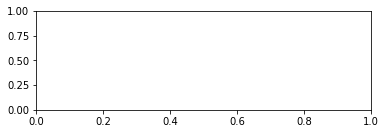

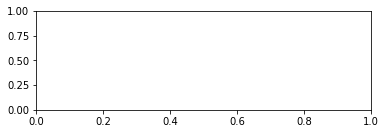

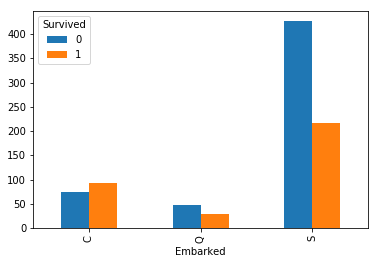

In [168]:
plt.subplot(211)
emb_s[[0,1]].plot(kind="bar")


plt.subplot(212)
emb_s[[0,1]].plot(kind="bar")
plt.show()

In [169]:
emb_s[[0,1]]

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


# 写一个自动提取比例，然后计算各单个变量与目标值的相关性
1. 获取所有category类型
2. 用`pd.pivote_table`处理
3. 计算比例
4. 循环计算每一个